# Customer analysis in marketing campaigns

In this exercise, you work for a consulting firm as data scientist. In this scenario, your client is the marketing team of a grocery store. They would like to find which are the ideal customers according to the results of the last marketing campaigns. Your analysis will be helpful to adapt and modify products according to the different needs and behavior of their customers.

You dispose of a dataset from the mall dataset with several features:


People

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if customer complained in the last 2 years, 0 otherwise


- ID : Identifiant unique du client
- Year_Birth : Année de naissance du client
- Education : Niveau d'éducation du client
- Marital_Status : Situation de famille du client
- Revenu : Revenu annuel du ménage du client
- Kidhome : Nombre d'enfants dans le foyer du client
- Teenhome : Nombre d'adolescents dans le foyer du client
- Dt_Customer : Date d'inscription du client dans l'entreprise.
- Recency : Nombre de jours depuis le dernier achat du client
- Plainte : 1 si le client s'est plaint au cours des 2 dernières années, 0 sinon.

Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years 


- MntWines : Montant dépensé en vin au cours des 2 dernières années
- MntFruits : Montant dépensé pour les fruits au cours des 2 dernières années
- MntMeatProducts : Montant dépensé pour la viande au cours des 2 dernières années
- MntFishProducts : Montant dépensé pour du poisson au cours des 2 dernières années
- MntSweetProducts : Montant dépensé en sucreries au cours des 2 dernières années
- MntGoldProds : Montant dépensé en or au cours des 2 dernières années

Promotion

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise


- NumDealsPurchases : Nombre d'achats effectués avec une réduction
- AcceptedCmp1 : 1 si le client a accepté l'offre lors de la 1ère campagne, 0 sinon.
- AcceptedCmp2 : 1 si le client a accepté l'offre lors de la 2ème campagne, 0 sinon.
- AcceptedCmp3 : 1 si le client a accepté l'offre lors de la 3ème campagne, 0 sinon.
- AcceptedCmp4 : 1 si le client a accepté l'offre lors de la 4ème campagne, 0 sinon.
- AcceptedCmp5 : 1 si le client a accepté l'offre lors de la 5ème campagne, 0 sinon.
- Réponse : 1 si le client a accepté l'offre lors de la dernière campagne, 0 sinon.


Place

- NumWebPurchases: Number of purchases made through the company’s web site
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s web site in the last month

'Z_CostContact' and 'Z_Revenue' contains constant value across all the observations and therefore they will not contribute anything in the analysis.


- NumWebPurchases : Nombre d'achats effectués sur le site web de l'entreprise.
- NumCatalogPurchases : Nombre d'achats effectués par le biais d'un catalogue
- NumStorePurchases : Nombre d'achats effectués directement en magasin
- NumWebVisitsMonth : Nombre de visites sur le site web de l'entreprise au cours du dernier mois.  

Z_CostContact' et 'Z_Revenue' contiennent des valeurs constantes pour toutes les observations et ne contribueront donc pas à l'analyse.

You have two days to do this study

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# mini-batch k-means clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import MiniBatchKMeans
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler



In [348]:
df = pd.read_csv('../projets_clients_analysis/marketing_campaign.csv', sep="\t")
pd.set_option('display.max_rows', df.shape[0]+1)
pd.set_option('display.max_columns', df.shape[0]+1)
df


ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
0      5524        1957  Graduation         Single   58138.0        0   
1      2174        1954  Graduation         Single   46344.0        1   
2      4141        1965  Graduation       Together   71613.0        0   
3      6182        1984  Graduation       Together   26646.0        1   
4      5324        1981         PhD        Married   58293.0        1   
5      7446        1967      Master       Together   62513.0        0   
6       965        1971  Graduation       Divorced   55635.0        0   
7      6177        1985         PhD        Married   33454.0        1   
8      4855        1974         PhD       Together   30351.0        1   
9      5899        1950         PhD       Together    5648.0        1   
10     1994        1983  Graduation        Married       NaN        1   
11      387        1976       Basic        Married    7500.0        0   
12     2125        1959  Graduation       Divorced   63033.0        0   
13     8180        1952      Master       Divorced   59354.0        1   
14     2569        1987  Graduation        Married   17323.0        0   
15     2114        1946         PhD         Single   82800.0        0   
16     9736        1980  Graduation        Married   41850.0        1   
17     4939        1946  Graduation       Together   37760.0        0   
18     6565        1949      Master        Married   76995.0        0   
19     2278        1985    2n Cycle         Single   33812.0        1   
20     9360        1982  Graduation        Married   37040.0        0   
21     5376        1979  Graduation        Married    2447.0        1   
22     1993        1949         PhD        Married   58607.0        0   
23     4047        1954         PhD        Married   65324.0        0   
24     1409        1951  Graduation       Together   40689.0        0   
25     7892        1969  Graduation         Single   18589.0        0   
26     2404        1976  Graduation        Married   53359.0        1   
27     5255        1986  Graduation         Single       NaN        1   
28     9422        1989  Graduation        Married   38360.0        1   
29     1966        1965         PhD        Married   84618.0        0   
30     6864        1989      Master       Divorced   10979.0        0   
31     3033        1963      Master       Together   38620.0        0   
32     5710        1970  Graduation       Together   40548.0        0   
33     7373        1952         PhD       Divorced   46610.0        0   
34     8755        1946      Master        Married   68657.0        0   
35    10738        1951      Master         Single   49389.0        1   
36     4339        1970         PhD        Married   67353.0        0   
37    10755        1976    2n Cycle        Married   23718.0        1   
38     8595        1973  Graduation          Widow   42429.0        0   
39     2968        1943         PhD       Divorced   48948.0        0   
40     8601        1980  Graduation        Married   80011.0        0   
41      503        1985      Master        Married   20559.0        1   
42     8430        1957  Graduation       Together   21994.0        0   
43     7281        1959         PhD         Single       NaN        0   
44     2139        1975      Master        Married    7500.0        1   
45     1371        1976  Graduation         Single   79941.0        0   
46     9909        1996    2n Cycle        Married    7500.0        0   
47     7286        1968  Graduation       Together   41728.0        1   
48     7244        1951  Graduation         Single       NaN        2   
49     6566        1954         PhD        Married   72550.0        1   
50     8614        1957  Graduation          Widow   65486.0        0   
51     4114        1964      Master        Married   79143.0        0   
52     1331        1977  Graduation         Single   35790.0        1   
53     2225        1977  Graduation       Divorced   82582.0       

In [212]:
df.shape

(2240, 29)

# EDA

In [213]:
df.duplicated().value_counts()
df[df['Income'].isnull()]

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
10     1994        1983  Graduation        Married     NaN        1         0   
27     5255        1986  Graduation         Single     NaN        1         0   
43     7281        1959         PhD         Single     NaN        0         0   
48     7244        1951  Graduation         Single     NaN        2         1   
58     8557        1982  Graduation         Single     NaN        1         0   
71    10629        1973    2n Cycle        Married     NaN        1         0   
90     8996        1957         PhD        Married     NaN        2         1   
91     9235        1957  Graduation         Single     NaN        1         1   
92     5798        1973      Master       Together     NaN        0         0   
128    8268        1961         PhD        Married     NaN        0         1   
133    1295        1963  Graduation        Married     NaN        0         1   
312    2437        1989  Graduation        Married     NaN        0         0   
319    2863        1970  Graduation         Single     NaN        1         2   
1379  10475        1970      Master       Together     NaN        0         1   
1382   2902        1958  Graduation       Together     NaN        1         1   
1383   4345        1964    2n Cycle         Single     NaN        1         1   
1386   3769        1972         PhD       Together     NaN        1         0   
2059   7187        1969      Master       Together     NaN        1         1   
2061   1612        1981         PhD         Single     NaN        1         0   
2078   5079        1971  Graduation        Married     NaN        1         1   
2079  10339        1954      Master       Together     NaN        0         1   
2081   3117        1955  Graduation         Single     NaN        0         1   
2084   5250        1943      Master          Widow     NaN        0         0   
2228   8720        1978    2n Cycle       Together     NaN        0         0   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
10    15-11-2013       11         5          5                6   
27    20-02-2013       19         5          1                3   
43    05-11-2013       80        81         11               50   
48    01-01-2014       96        48          5               48   
58    17-06-2013       57        11          3               22   
71    14-09-2012       25        25          3               43   
90    19-11-2012        4       230         42              192   
91    27-05-2014       45         7          0                8   
92    23-11-2013       87       445         37              359   
128   11-07-2013       23       352          0               27   
133   11-08-2013       96       231         65              196   
312   03-06-2013       69       861        138              461   
319   23-08-2013       67       738         20              172   
1379  01-04-2013       39       187          5               65   
1382  03-09-2012       87        19          4               12   
1383  12-01-2014       49         5          1                9   
1386  02-03-2014       17        25          1               13   
2059  18-05-2013       52       375         42               48   
2061  31-05-2013       82        23          0               15   
2078  03-03-2013       82        71          1               16   
2079  23-06-2013       83       161          0               22   
2081  18-10-2013       95       264          0               21   
2084  30-10-2013       75       532        126              490   
2228  12-08-2012       53        32          2             1607   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
10                  0                 2             1                  1   
27                  3               263           362                  0   
43                  3                 2            39                  1   
48 

In [214]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2240.000000       2240.000000   2240.000000        2240.000000   
mean         37.525446         27.062946     44.021875           2.325000   
std          54.628979         41.280498     52.167439           1.932238   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.000000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        263.000000    362.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2240.000000          2240.000000        2240.000000   
mean          4.084821             2.662054           5.790179   
std           2.778714             2.923101           3.250958   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2240.000000   2240.000000   2240.000000   2240.000000   
mean            5.316518      0.072768      0.074554      0.072768   
std             2.426645      0.259813      0.262728      0.259813   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  Z_Revenue  \
count   2240.000000   2240.000000  2240.000000         2240.0     2240.0   
mean       0.064286      0.013393     0.009375            3.0       11.0   
std        0.245316      0.114976     0.096391            0.0        0.0   
min        0.000000      0.000000     0.000000            3.0       11.0   
25%        0.000000      0.000000     0.000000            3.0       11.0   
50%        0.000000      0.000000     0.000000            3.0       11.0   
75%        0.000000      0.000000     0.000000            3.0       11.0   
max        1.000000      1.000000     1.000000            3.0       11.0   

          Response  
count  2240.000000  
mean      0.149107  
std       0.356274  
min       0.000000  
25%       0.000000  
50%   

#### Supression des dvalurs NULL

In [215]:
df.dropna(inplace=True)

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

#### Transformation date en datetime et creation colonne ancienneté des clients

In [217]:
from datetime import *

df['Dt_Customer'] = df['Dt_Customer'].apply(pd.to_datetime)
df['Dt_Customer']

0      2012-04-09
1      2014-08-03
2      2013-08-21
3      2014-10-02
4      2014-01-19
5      2013-09-09
6      2012-11-13
7      2013-08-05
8      2013-06-06
9      2014-03-13
11     2012-11-13
12     2013-11-15
13     2013-11-15
14     2012-10-10
15     2012-11-24
16     2012-12-24
17     2012-08-31
18     2013-03-28
19     2012-03-11
20     2012-08-08
21     2013-06-01
22     2012-12-23
23     2014-11-01
24     2013-03-18
25     2013-02-01
26     2013-05-27
28     2013-05-31
29     2013-11-22
30     2014-05-22
31     2013-11-05
32     2012-10-10
33     2012-10-29
34     2013-02-20
35     2013-08-29
36     2013-12-31
37     2013-02-09
38     2014-11-02
39     2013-01-02
40     2013-04-29
41     2013-12-03
42     2012-12-24
44     2013-02-10
45     2014-06-28
46     2012-09-11
47     2013-05-24
49     2012-08-11
50     2014-12-05
51     2012-11-08
52     2013-02-01
53     2014-07-06
54     2013-12-06
55     2012-11-19
56     2013-02-04
57     2014-04-28
59     2014-03-03
60     201

In [296]:
# Calculation of age by date of birth and enrollment days
from datetime import timedelta 
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
dt_max = np.max(df['Dt_Customer'])
base_date = dt_max + timedelta(days=1)
df['customers_age'] = df.apply(lambda x: round(((base_date - pd.Timestamp(day=1, month=1, year=int(x.Year_Birth))).days) / 366), axis=1)
df['enrollment_days'] = df.apply(lambda x: (base_date - x.Dt_Customer).days, axis=1)
# df = df.drop(['customers_seniority'],axis=1)

In [298]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-04-09       58       635         88              546              172   
1  2014-08-03       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-10-02       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  total_amount_spend  \
0              3         11         1                1617   
1              3         11         0                  27   
2              3         11         0                 776   
3              3         11         0                  53   
4              3         11         0                 422   

   total_number_purchases  perc_Discounted_Purchases  enrollment_days  \
0                      22                      13.64              972   
1                       4                      50.00              126   
2                      20                       5.00              473   
3                       6                      33.33               66   
4                      14                      35.71              322   

   customers_age  
0             58  
1             61  
2             50  
3             31  
4             34

In [299]:
for column_name in df.drop(columns=['Dt_Customer']).columns :
    print(f"Unique {column_name}: {df[column_name].unique()}")

Unique ID: [5524 2174 4141 ... 7270 8235 9405]
Unique Year_Birth: [1957 1954 1965 1984 1981 1967 1971 1985 1974 1950 1976 1959 1952 1987
 1946 1980 1949 1982 1979 1951 1969 1989 1963 1970 1973 1943 1975 1996
 1968 1964 1977 1978 1955 1966 1988 1948 1958 1972 1960 1983 1945 1991
 1962 1953 1956 1992 1961 1900 1986 1893 1990 1947 1899 1993 1994 1941
 1944 1995 1940]
Unique Education: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Unique Marital_Status: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Unique Income: [58138. 46344. 71613. ... 56981. 69245. 52869.]
Unique Kidhome: [0 1 2]
Unique Teenhome: [0 1 2]
Unique Recency: [58 38 26 94 16 34 32 19 68 59 82 53 23 51 20 91 86 41 42 63  0 69 89  4
 96 56 31  8 55 37 76 99  3 88 72 24 92 39 29  2 54 57 30 12 18 75 90  1
 40  9 87  5 95 48 70 79 84 44 43 35 15 17 46 27 25 74 85 65 13 83 10 21
 61 73 47 36 49 28 64 98 78 77 81 80 45 14 52 93 50 60 11 66 97 62  6 33
 22 71 67  7]
Unique MntWines: [ 635   11  426  

In [300]:
df['ID'].duplicated().value_counts()

False    2216
Name: ID, dtype: int64

In [301]:
df['Dt_Customer'].duplicated().value_counts()

True     1554
False     662
Name: Dt_Customer, dtype: int64

#### Création colonne total_number_purchases et total_amount_spend

In [302]:
# MntWines : Montant dépensé en vin au cours des 2 dernières années
# MntFruits : Montant dépensé pour les fruits au cours des 2 dernières années
# MntMeatProducts : Montant dépensé pour la viande au cours des 2 dernières années
# MntFishProducts : Montant dépensé pour du poisson au cours des 2 dernières années
# MntSweetProducts : Montant dépensé en sucreries au cours des 2 dernières années
# MntGoldProds : Montant dépensé en or au cours des 2 dernières années

df["total_amount_spend"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]

In [303]:
# NumWebPurchases : Nombre d'achats effectués sur le site web de l'entreprise.
# NumCatalogPurchases : Nombre d'achats effectués par le biais d'un catalogue
# NumStorePurchases : Nombre d'achats effectués directement en magasin
# NumWebVisitsMonth : Nombre de visites sur le site web de l'entreprise au cours du dernier mois.

df["total_number_purchases"] = df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"]

In [304]:
df['perc_Discounted_Purchases'] = df.apply(lambda x: round(((x.NumDealsPurchases / x.total_number_purchases if x.total_number_purchases != 0 else 1) * 100), 2), axis=1)

In [305]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-04-09       58       635         88              546              172   
1  2014-08-03       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-10-02       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  total_amount_spend  \
0              3         11         1                1617   
1              3         11         0                  27   
2              3         11         0                 776   
3              3         11         0                  53   
4              3         11         0                 422   

   total_number_purchases  perc_Discounted_Purchases  enrollment_days  \
0                      22                      13.64              972   
1                       4                      50.00              126   
2                      20                       5.00              473   
3                       6                      33.33               66   
4                      14                      35.71              322   

   customers_age  
0             58  
1             61  
2             50  
3             31  
4             34

In [316]:
df.to_csv("../projets_clients_analysis/csv/df_marketing_campaigns.csv")

In [327]:
df['Dt_Customer']

0      2012-04-09
1      2014-08-03
2      2013-08-21
3      2014-10-02
4      2014-01-19
5      2013-09-09
6      2012-11-13
7      2013-08-05
8      2013-06-06
9      2014-03-13
11     2012-11-13
12     2013-11-15
13     2013-11-15
14     2012-10-10
15     2012-11-24
16     2012-12-24
17     2012-08-31
18     2013-03-28
19     2012-03-11
20     2012-08-08
21     2013-06-01
22     2012-12-23
23     2014-11-01
24     2013-03-18
25     2013-02-01
26     2013-05-27
28     2013-05-31
29     2013-11-22
30     2014-05-22
31     2013-11-05
32     2012-10-10
33     2012-10-29
34     2013-02-20
35     2013-08-29
36     2013-12-31
37     2013-02-09
38     2014-11-02
39     2013-01-02
40     2013-04-29
41     2013-12-03
42     2012-12-24
44     2013-02-10
45     2014-06-28
46     2012-09-11
47     2013-05-24
49     2012-08-11
50     2014-12-05
51     2012-11-08
52     2013-02-01
53     2014-07-06
54     2013-12-06
55     2012-11-19
56     2013-02-04
57     2014-04-28
59     2014-03-03
60     201

# Customer Segmentation

#### Création df RFM

In [317]:
latest_date = max(df['Dt_Customer'])
latest_date

Timestamp('2014-12-06 00:00:00')

In [318]:
RFMScores= df.filter(['ID','Recency','total_number_purchases','total_amount_spend'], axis=1)

In [346]:
RFMScores

ID  Recency  total_number_purchases  total_amount_spend  R  F  M  \
0      5524       58                      22                1617  3  1  1   
1      2174       38                       4                  27  2  5  5   
2      4141       26                      20                 776  2  2  2   
3      6182       26                       6                  53  2  5  5   
4      5324       94                      14                 422  5  3  3   
5      7446       16                      20                 716  1  2  2   
6       965       34                      17                 590  2  2  3   
7      6177       32                       8                 169  2  4  4   
8      4855       19                       5                  46  1  5  5   
9      5899       68                       1                  49  4  5  5   
11      387       59                       5                  61  4  5  5   
12     2125       82                      15                1102  5  3  2   
13     8180       53                      12                 310  3  3  3   
14     2569       38                       4                  46  2  5  5   
15     2114       23                      25                1315  1  1  1   
16     9736       51                       6                  96  3  5  4   
17     4939       20                      11                 317  1  3  3   
18     6565       91                      24                1782  5  1  1   
19     2278       86                       6                 133  5  5  4   
20     9360       41                      11                 316  3  3  3   
21     5376       42                      28                1730  3  1  1   
22     1993       63                      14                 972  4  3  2   
23     4047        0                      17                 544  1  2  3   
24     1409       69                      13                 444  4  3  3   
25     7892       89                       6                  75  5  5  4   
26     2404        4                      10                 257  1  3  3   
28     9422       26                       7                 131  2  4  4   
29     1966       96                      25                1672  5  1  1   
30     6864       34                       6                  30  2  5  5   
31     3033       56                      10                 318  3  3  3   
32     5710       31                       7                 120  2  4  4   
33     7373        8                      11                 302  1  3  3   
34     8755        4                      17                1196  1  2  1   
35    10738       55                       5                  65  3  5  5   
36     4339       37                      23                 913  2  1  2   
37    10755       76                       6                  81  4  5  4   
38     8595       99                       5                  67  5  5  5   
39     2968       53                      22                 902  3  1  2   
40     8601        3                      19                1395  1  2  1   
41      503       88                       5                  53  5  5  5   
42     8430        4                       3                  22  1  5  5   
44     2139       19                       5                  31  1  5  5   
45     1371       72                      15                 984  4  3  2   
46     9909       24                       7                 122  1  4  4   
47     7286       92                       4                  55  5  5  5   
49     6566       39                      19                1319  2  2  1   
50     8614       29                      16                 507  2  2  3   
51     4114        2                      28                1693  1  1  1   
52     1331       54                       5                  72  3  5  4   
53     2225       54                      20                1617  3  2  1   
54     9381       57                      16                 606  3  2  3   
55   

In [347]:
RFMScores.describe().T

count         mean          std  min      25%  \
ID                      2216.0  5588.353339  3249.376275  0.0  2814.75   
Recency                 2216.0    49.012635    28.948352  0.0    24.00   
total_number_purchases  2216.0    12.557310     7.204611  0.0     6.00   
total_amount_spend      2216.0   607.075361   602.900476  5.0    69.00   
R                       2216.0     2.938177     1.468485  1.0     1.00   
F                       2216.0     3.183664     1.495856  1.0     2.00   
M                       2216.0     3.054152     1.469249  1.0     2.00   
RFMScore                2216.0     9.175993     3.222478  3.0     7.00   

                           50%      75%      max  
ID                      5458.5  8421.75  11191.0  
Recency                   49.0    74.00     99.0  
total_number_purchases    12.0    18.00     32.0  
total_amount_spend       396.5  1048.00   2525.0  
R                          3.0     4.00      5.0  
F                          3.0     5.00      5.0  
M                          3.0     5.00      5.0  
RFMScore                   9.0    12.00     15.0

In [321]:
#Split into three segment using quantiles
quantiles = RFMScores.quantile([0.25,0.40,0.60,0.80])
quantiles = quantiles.to_dict()

In [322]:
# Functions to create R, F, M segments
def Rscoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.40]:
        return 2
    elif x <= d[p][0.60]:
        return 3
    elif x <= d[p][0.80]:
        return 4
    else:
        return 5

def FnMcoring(x,p,d):
    if x <= d[p][0.25]:
        return 5
    elif x <= d[p][0.40]:
        return 4
    elif x <= d[p][0.60]:
        return 3
    elif x <= d[p][0.80]:
        return 2
    else:
        return 1

In [323]:
RFMScores['R'] = RFMScores['Recency'].apply(Rscoring, args=('Recency',quantiles,))
RFMScores['F'] = RFMScores['total_number_purchases'].apply(FnMcoring, args=('total_number_purchases',quantiles,))
RFMScores['M'] = RFMScores['total_amount_spend'].apply(FnMcoring, args=('total_amount_spend',quantiles,))
RFMScores.head()

ID  Recency  total_number_purchases  total_amount_spend  R  F  M
0  5524       58                      22                1617  3  1  1
1  2174       38                       4                  27  2  5  5
2  4141       26                      20                 776  2  2  2
3  6182       26                       6                  53  2  5  5
4  5324       94                      14                 422  5  3  3

In [324]:
# SHow show column combined concatenante column score
RFMScores['RFMgroup'] = RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)

#Total sum of RFMgroup

RFMScores['RFMScore'] = RFMScores[['R','F','M']].sum(axis = 1)
RFMScores.head()

ID  Recency  total_number_purchases  total_amount_spend  R  F  M  \
0  5524       58                      22                1617  3  1  1   
1  2174       38                       4                  27  2  5  5   
2  4141       26                      20                 776  2  2  2   
3  6182       26                       6                  53  2  5  5   
4  5324       94                      14                 422  5  3  3   

  RFMgroup  RFMScore  
0      311         5  
1      255        12  
2      222         6  
3      255        12  
4      533        11

In [329]:
#Assign fidelity level to each customer

fidelity_level = {
    r'hibernating': '[1-2][1-2]',
    r'at risk': '[1-2][3-4]',
    r'can\'t loose': '[1-2]5',
    r'about to sleep': '3[1-2]',
    r'need attention': '33',
    r'loyal customers': '[3-4][4-5]',
    r'promising': '41',
    r'new customers': '51',
    r'potential loyalists': '[4-5][2-3]',
    r'champions': '5[4-5]'
}

score_cuts = pd.qcut(RFMScores.RFMScore, q=10,labels = fidelity_level)
RFMScores['RFM_Fidelity_Level'] = score_cuts.values
RFMScores.reset_index().head()
# RFMScores['RFMgroup'].value_counts(ascending=False)


index    ID  Recency  total_number_purchases  total_amount_spend  R  F  M  \
0      0  5524       58                      22                1617  3  1  1   
1      1  2174       38                       4                  27  2  5  5   
2      2  4141       26                      20                 776  2  2  2   
3      3  6182       26                       6                  53  2  5  5   
4      4  5324       94                      14                 422  5  3  3   

  RFMgroup  RFMScore RFM_Fidelity_Level  
0      311         5        hibernating  
1      255        12      new customers  
2      222         6            at risk  
3      255        12      new customers  
4      533        11          promising

In [379]:
df_champion = df.copy()
df_champion['RFM_Fidelity_Level'] = RFMScores['RFM_Fidelity_Level']
df_champion[df_champion['RFM_Fidelity_Level'] == 'champions'].describe()

ID   Year_Birth         Income     Kidhome    Teenhome  \
count    106.000000   106.000000     106.000000  106.000000  106.000000   
mean    5617.735849  1970.632075   34734.141509    0.811321    0.481132   
std     3273.930553    12.786396   19892.415613    0.480341    0.520643   
min       73.000000  1900.000000    7500.000000    0.000000    0.000000   
25%     2742.250000  1964.250000   24400.500000    1.000000    0.000000   
50%     5657.500000  1973.000000   33612.000000    1.000000    0.000000   
75%     8158.000000  1979.000000   40995.750000    1.000000    1.000000   
max    11181.000000  1996.000000  156924.000000    2.000000    2.000000   

          Recency    MntWines   MntFruits  MntMeatProducts  MntFishProducts  \
count  106.000000  106.000000  106.000000       106.000000       106.000000   
mean    88.867925   15.641509    2.320755         9.792453         3.216981   
std      6.276298   13.659247    2.880301         6.151604         4.002391   
min     80.000000    0.000000    0.000000         1.000000         0.000000   
25%     83.000000    5.000000    0.000000         5.000000         0.000000   
50%     89.000000   12.000000    1.000000         8.000000         2.000000   
75%     94.000000   24.000000    3.000000        13.750000         4.000000   
max     99.000000   55.000000   12.000000        29.000000        23.000000   

       MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
count        106.000000    106.000000         106.000000       106.000000   
mean           2.556604      7.047170           1.481132         1.339623   
std            3.659509      5.875505           0.795597         0.630748   
min            0.000000      0.000000           0.000000         0.000000   
25%            0.000000      3.000000           1.000000         1.000000   
50%            1.000000      5.000000           1.000000         1.000000   
75%            4.000000     10.000000           2.000000         2.000000   
max           16.000000     25.000000           4.000000         3.000000   

       NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
count           106.000000         106.000000         106.000000   
mean              0.188679           2.745283           6.198113   
std               0.393112           0.648240           1.758895   
min               0.000000           0.000000           0.000000   
25%               0.000000           2.000000           5.000000   
50%               0.000000           3.000000           6.500000   
75%               0.000000           3.000000           7.000000   
max               1.000000           4.000000          10.000000   

       AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
count    106.000000         106.0         106.0         106.0         106.0   
mean       0.056604           0.0           0.0           0.0           0.0   
std        0.232182           0.0           0.0           0.0           0.0   
min        0.000000           0.0           0.0           0.0           0.0   
25%        0.000000           0.0           0.0           0.0           0.0   
50%        0.000000           0.0           0.0           0.0           0.0   
75%        0.000000           0.0           0.0           0.0           0.0   
max        1.000000           0.0           0.0           0.0           0.0   

         Complain  Z_CostContact  Z_Revenue  Response  
count  106.000000          106.0      106.0     106.0  
mean     0.037736            3.0       11.0       0.0  
std      0.191462            0.0        0.0       0.0  
min      0.000000            3.0       11.0       0.0  
25%      0.000000            3.0       11.0       0.0  
50%      0.000000            3.0       11.0       0.0  
75%      0.000000            3.0       11.0       0.0  
max      1.000000            3.0       11.0       0.0

In [384]:
df_champion.max()

ID                          11191
Year_Birth                   1996
Education                     PhD
Marital_Status               YOLO
Income                   666666.0
Kidhome                         2
Teenhome                        2
Dt_Customer            31-12-2013
Recency                        99
MntWines                     1493
MntFruits                     199
MntMeatProducts              1725
MntFishProducts               259
MntSweetProducts              263
MntGoldProds                  362
NumDealsPurchases              15
NumWebPurchases                27
NumCatalogPurchases            28
NumStorePurchases              13
NumWebVisitsMonth              20
AcceptedCmp3                    1
AcceptedCmp4                    1
AcceptedCmp5                    1
AcceptedCmp1                    1
AcceptedCmp2                    1
Complain                        1
Z_CostContact                   3
Z_Revenue                      11
Response                        1
RFM_Fidelity_L

In [381]:
outlier = df_champion['Income'].quantile(0.95)
df_champion_new = df_champion[df_champion['Income'] < outlier]

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
5      7446        1967      Master       Together  62513.0        0   
6       965        1971  Graduation       Divorced  55635.0        0   
7      6177        1985         PhD        Married  33454.0        1   
8      4855        1974         PhD       Together  30351.0        1   
9      5899        1950         PhD       Together   5648.0        1   
11      387        1976       Basic        Married   7500.0        0   
12     2125        1959  Graduation       Divorced  63033.0        0   
13     8180        1952      Master       Divorced  59354.0        1   
14     2569        1987  Graduation        Married  17323.0        0   
15     2114        1946         PhD         Single  82800.0        0   
16     9736        1980  Graduation        Married  41850.0        1   
17     4939        1946  Graduation       Together  37760.0        0   
18     6565        1949      Master        Married  76995.0        0   
19     2278        1985    2n Cycle         Single  33812.0        1   
20     9360        1982  Graduation        Married  37040.0        0   
21     5376        1979  Graduation        Married   2447.0        1   
22     1993        1949         PhD        Married  58607.0        0   
23     4047        1954         PhD        Married  65324.0        0   
24     1409        1951  Graduation       Together  40689.0        0   
25     7892        1969  Graduation         Single  18589.0        0   
26     2404        1976  Graduation        Married  53359.0        1   
28     9422        1989  Graduation        Married  38360.0        1   
30     6864        1989      Master       Divorced  10979.0        0   
31     3033        1963      Master       Together  38620.0        0   
32     5710        1970  Graduation       Together  40548.0        0   
33     7373        1952         PhD       Divorced  46610.0        0   
34     8755        1946      Master        Married  68657.0        0   
35    10738        1951      Master         Single  49389.0        1   
36     4339        1970         PhD        Married  67353.0        0   
37    10755        1976    2n Cycle        Married  23718.0        1   
38     8595        1973  Graduation          Widow  42429.0        0   
39     2968        1943         PhD       Divorced  48948.0        0   
40     8601        1980  Graduation        Married  80011.0        0   
41      503        1985      Master        Married  20559.0        1   
42     8430        1957  Graduation       Together  21994.0        0   
44     2139        1975      Master        Married   7500.0        1   
45     1371        1976  Graduation         Single  79941.0        0   
46     9909        1996    2n Cycle        Married   7500.0        0   
47     7286        1968  Graduation       Together  41728.0        1   
49     6566        1954         PhD        Married  72550.0        1   
50     8614        1957  Graduation          Widow  65486.0        0   
51     4114        1964      Master        Married  79143.0        0   
52     1331        1977  Graduation         Single  35790.0        1   
53     2225        1977  Graduation       Divorced  82582.0        0   
54     9381        1978  Graduation        Married  66373.0        1   
55     6260        1955      Master       Together  82384.0        0   
56    10383        1966  Graduation       Divorced  70287.0        0   
57     7437        1988  Graduation         Single  27938.0        1   
59     8375        1968         PhD        Married  55954.0        0   
60     6853        1982      Master         Singl

In [383]:
df_champion_new.max()

ID                          11191
Year_Birth                   1996
Education                     PhD
Marital_Status               YOLO
Income                    84117.0
Kidhome                         2
Teenhome                        2
Dt_Customer            31-12-2013
Recency                        99
MntWines                     1493
MntFruits                     199
MntMeatProducts              1725
MntFishProducts               259
MntSweetProducts              198
MntGoldProds                  321
NumDealsPurchases              15
NumWebPurchases                25
NumCatalogPurchases            28
NumStorePurchases              13
NumWebVisitsMonth              20
AcceptedCmp3                    1
AcceptedCmp4                    1
AcceptedCmp5                    1
AcceptedCmp1                    1
AcceptedCmp2                    1
Complain                        1
Z_CostContact                   3
Z_Revenue                      11
Response                        1
RFM_Fidelity_L

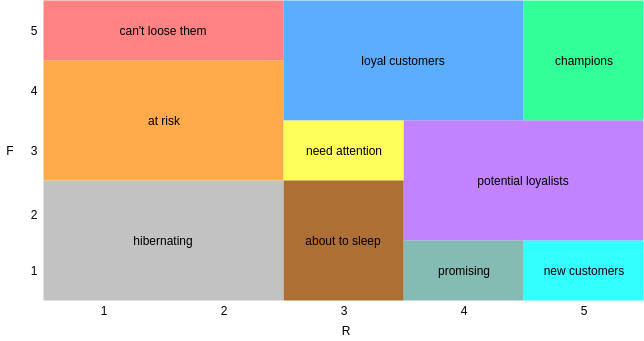

In [330]:
RFMScores.to_csv(r'../projets_clients_analysis/csv/RFMScores.csv', index = False)

In [331]:
df_kmean = df.copy()

In [334]:

df_encoded = pd.get_dummies(columns = ['Education'], prefix='Education_',data = df_kmean)
df_for_kmean = pd.get_dummies(columns = ['Marital_Status'], prefix='Marital_Status_',data = df_encoded)
drop_date_df = df_for_kmean.drop(columns='Dt_Customer')
drop_date_df.head()

ID  Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0  5524        1957  58138.0        0         0       58       635         88   
1  2174        1954  46344.0        1         1       38        11          1   
2  4141        1965  71613.0        0         0       26       426         49   
3  6182        1984  26646.0        1         0       26        11          4   
4  5324        1981  58293.0        1         0       94       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0              546              172                88            88   
1                6                2                 1             6   
2              127              111                21            42   
3               20               10                 3             5   
4              118               46                27            15   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  3                8                   10                  4   
1                  2                1                    1                  2   
2                  1                8                    2                 10   
3                  2                2                    0                  4   
4                  5                5                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  \
0             0         0              3         11         1   
1             0         0              3         11         0   
2             0         0              3         11         0   
3             0         0              3         11         0   
4             0         0              3         11         0   

   total_amount_spend  total_number_purchases  perc_Discounted_Purchases  \
0                1617                      22                      13.64   
1                  27                       4                      50.00   
2                 776                      20                       5.00   
3                  53                       6                      33.33   
4                 422                      14                      35.71   

   enrollment_days  customers_age  Education__2n Cycle  Education__Basic  \
0              972             58                    0                 0   
1              126             61                    0                 0   
2              473             50                    0                 0   
3               66             31                    0                 0   
4              322             34                    0                 0   

   Education__Graduation  Education__Master  Education__PhD  \
0                      1                  0               0   
1                      1                  0               0   
2                      1                  0               0   
3                      1                  0               0   
4                      0                  0               1   

   Marital_Status__Absurd  Marital_Status__Alone  Marital_Status__Divorced  \
0                       0                      0                         0   
1                       0                      0                         0   
2                       0                      0                         0   
3                       0                      0                         0   
4                       0                      0 

In [333]:
# from sklearn.preprocessing import OrdinalEncoder

# OHEncoding = df.copy()
# # df_encoded = pd.get_dummies(columns = ['Education'], prefix='Education_',data = OHEncoding)
# # df_encoded = pd.get_dummies(columns = ['Marital_Status'], prefix='Marital_Status_',data = OHEncoding)
# for column in ['Education', 'Marital_Status']:
#     df_encoded = pd.get_dummies(df[column])
#     df_encoded[df.columns] = df

# # pickle.dump(df_encoded, open('../DATA/OHencoding.sav', 'wb'))
# df_for_kmean = df_encoded.drop(columns=['Education','Marital_Status'])
# df_for_kmean


# # df[['Gender']] = enc.fit_transform(mall_df[['Gender']])
# # mall_df

Text(0, 0.5, 'WCSS')

<Figure size 864x576 with 0 Axes>

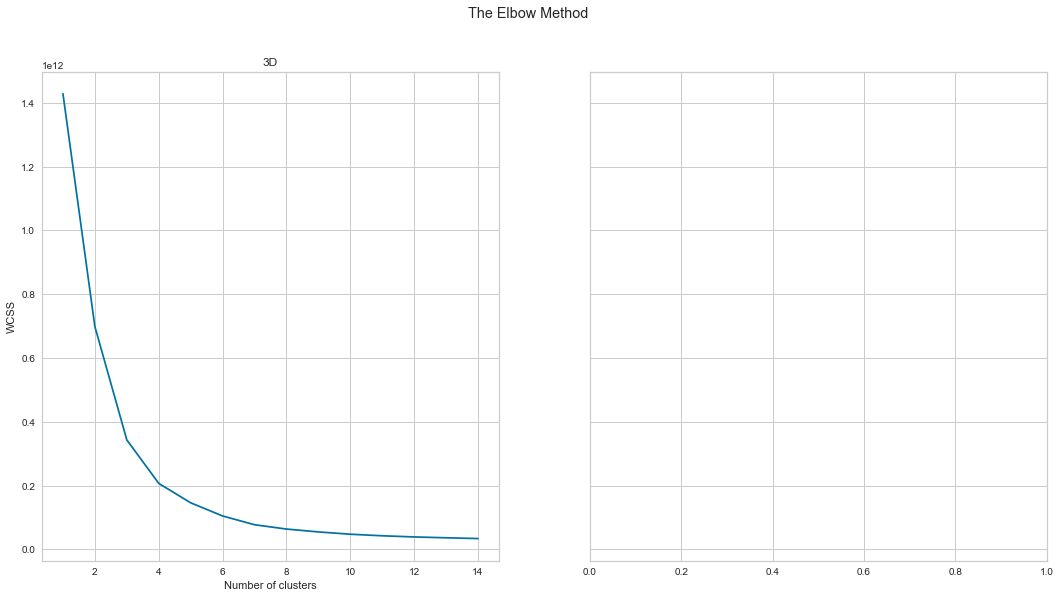

In [335]:
from sklearn.cluster import KMeans
#pip install yellowbrick
plt.figure(figsize=(12, 8))

wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 412)
    kmeans.fit(drop_date_df)
    wcss.append(kmeans.inertia_)
wcss2 = []

fig, axs = plt.subplots(1, 2, figsize=(18, 9), sharey=True)
fig.suptitle('The Elbow Method')
axs[0].plot(range(1, 15), wcss)
axs[0].set_title('3D')
axs[0].set_xlabel('Number of clusters')
axs[0].set_ylabel('WCSS')

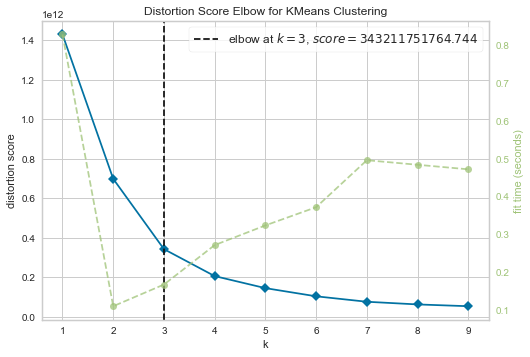

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [336]:
from sklearn.cluster import KMeans
#pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
X= drop_date_df

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

In [337]:
# import pickle
kmeans = drop_date_df

kmeansed = KMeans(n_clusters =3,init='k-means++').fit(kmeans)
#pickle.dump(kmeansed, open('../DATA/kmean.sav', 'wb'))
kmeansed.labels_
kmeans['kmeans_cluster'] = kmeansed.predict(kmeans)

In [338]:
clusterer['kmeans_cluster'].value_counts()

0    1137
1    1078
2       1
Name: kmeans_cluster, dtype: int64

In [339]:
clusterer = kmeans
clusterer[clusterer['kmeans_cluster'] == 2]

ID  Year_Birth    Income  Kidhome  Teenhome  Recency  MntWines  \
2233  9432        1977  666666.0        1         0       23         9   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
2233         14               18                8                 1   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
2233            12                  4                3                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
2233                  3                  6             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
2233             0             0             0         0              3   

      Z_Revenue  Response  total_amount_spend  total_number_purchases  \
2233         11         0                  62                       7   

      perc_Discounted_Purchases  enrollment_days  customers_age  \
2233                      57.14              669             38   

      Education__2n Cycle  Education__Basic  Education__Graduation  \
2233                    0                 0                      1   

      Education__Master  Education__PhD  Marital_Status__Absurd  \
2233                  0               0                       0   

      Marital_Status__Alone  Marital_Status__Divorced  \
2233                      0                         0   

      Marital_Status__Married  Marital_Status__Single  \
2233                        0                       0   

      Marital_Status__Together  Marital_Status__Widow  Marital_Status__YOLO  \
2233                         1                      0                     0   

      kmeans_cluster  
2233               2

cluster only for this row i have to drop it

In [340]:
drop_date_outliers = drop_date_df[drop_date_df['Income']<666666]


In [342]:
drop_date_outliers['customers_age'].unique()

array([ 58,  61,  50,  31,  34,  48,  44,  30,  41,  65,  39,  56,  63,
        28,  69,  35,  66,  33,  36,  64,  46,  26,  52,  45,  42,  72,
        40,  19,  47,  51,  38,  37,  60,  49,  27,  67,  57,  43,  55,
        32,  70,  24,  53,  62,  59,  23,  54, 115,  29, 122,  25,  68,
       116,  22,  21,  74,  71,  20,  75], dtype=int64)

In [343]:
drop_date_outliers[drop_date_outliers['Income']>666666]

Empty DataFrame
Columns: [ID, Year_Birth, Income, Kidhome, Teenhome, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response, total_amount_spend, total_number_purchases, perc_Discounted_Purchases, enrollment_days, customers_age, Education__2n Cycle, Education__Basic, Education__Graduation, Education__Master, Education__PhD, Marital_Status__Absurd, Marital_Status__Alone, Marital_Status__Divorced, Marital_Status__Married, Marital_Status__Single, Marital_Status__Together, Marital_Status__Widow, Marital_Status__YOLO, kmeans_cluster]
Index: []

In [344]:
# import pickle
kmeans = drop_date_outliers

kmeansed = KMeans(n_clusters =5,init='k-means++').fit(kmeans)
#pickle.dump(kmeansed, open('../DATA/kmean.sav', 'wb'))
kmeansed.labels_
kmeans['kmeans_cluster'] = kmeansed.predict(kmeans)

<ipython-input-344-878159621dc1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kmeans['kmeans_cluster'] = kmeansed.predict(kmeans)


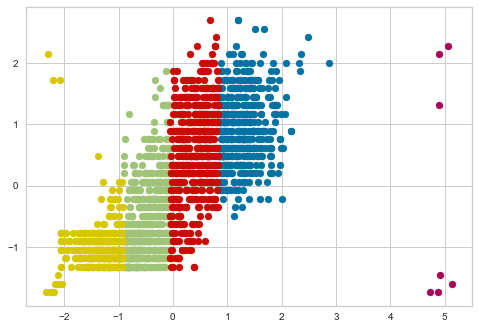

In [193]:
clusterer_clean = kmeans
clusterer_clean.head()
clusterer_clean['kmeans_cluster'].value_counts()
X  = StandardScaler().fit_transform(drop_date_outliers)
yhat = kmeansed.predict(kmeans)
clusters = unique(yhat)
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 2], X[row_ix, 28])
# show the plot
pyplot.show()

In [345]:
clusterer_clean.to_csv('../projets_clients_analysis/csv/df_for_clustering.csv')

# Conlusions